## Tuning of LIF Model for Interneurons

WARNING    Cannot use Cython, a test compilation failed: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/ (DistutilsPlatformError) [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]
INFO       Cannot use compiled code, falling back to the numpy code generation target. Note that this will likely be slower than using compiled code. Set the code generation to numpy manually to avoid this message:
prefs.codegen.target = "numpy" [brian2.devices.device.codegen_fallback]


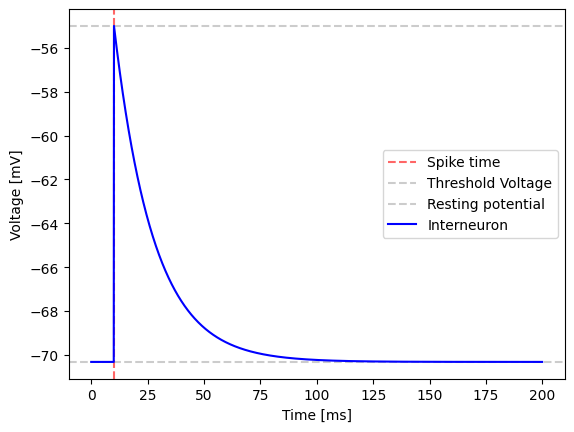

In [1]:
from brian2 import *
import matplotlib.pyplot as plt

start_scope()

v_th_int        =    -55*mV   # Firing threshold
v_rest_int      = -70.32*mV   # Rest potential (Liao et al., 2010)
tau_int         =  17.53*ms

neuron_model = Equations(''' dv/dt = (v_rest_int - v)/tau_int : volt ''')

# Define the time at which you want the neuron to spike
spike_time = 10 * ms  

# Create a SpikeGeneratorGroup with one neuron, spiking at `spike_time`
spike_gen = SpikeGeneratorGroup(1, [0], [spike_time])

nGroup = NeuronGroup(1, neuron_model, threshold='v>v_th_int', reset='v=v_rest_int', method='euler')

nGroup.v = v_rest_int

# Connect the SpikeGeneratorGroup to your neuron group
synapse = Synapses(spike_gen, nGroup, on_pre='v = v_th_int')
synapse.connect()

volMon = StateMonitor(nGroup, 'v', record=True)

run(200*ms)

plt.axvline(spike_time/ms, linestyle='--', color='red',  alpha=.6, label='Spike time')
plt.axhline(v_th_int/mV,      linestyle='--', color='gray', alpha=.4, label='Threshold Voltage')
plt.axhline(v_rest_int/mV,     linestyle='--', color='gray', alpha=.4, label='Resting potential')
plt.plot(volMon.t/ms, volMon.v[0]/mV, color='blue', label='Interneuron')
plt.ylabel('Voltage [mV]')
plt.legend()
plt.xlabel('Time [ms]')


plt.show()

## Tuning of LIF Model for nXIIts Neurons

Firing rate: 15. Hz


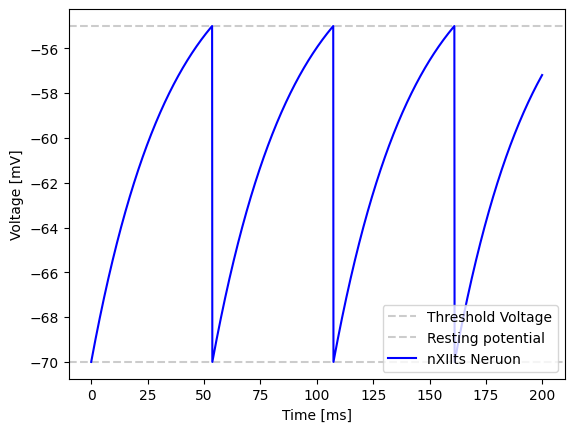

In [2]:
from brian2 import *
import matplotlib.pyplot as plt

start_scope()

v_th_nXIIts        =    -55*mV  # Firing threshold
v_rest_nXIIts      =    -70*mV  
I_ext              =    0.08*nA   # External input current ###
R_nXIIts           = 239.85*Mohm #239.85*Mohm
tau_nXIIts         =  35.29*ms

neuron_model = Equations(''' dv/dt = ((v_rest_nXIIts - v) + I_ext*R_nXIIts)/tau_nXIIts : volt ''')

# Define the time at which you want the neuron to spike
spike_time = 10 * ms  

nGroup = NeuronGroup(1, neuron_model, threshold='v>v_th_nXIIts', reset='v=v_rest_nXIIts', method='euler')

nGroup.v = v_rest_nXIIts

spikeMon = SpikeMonitor(nGroup)
volMon = StateMonitor(nGroup, 'v', record=True)

runtime = 200*ms
run(runtime)

print('Firing rate:', spikeMon.count[0]/runtime)

plt.axhline(v_th_nXIIts/mV,      linestyle='--', color='gray', alpha=.4, label='Threshold Voltage')
plt.axhline(v_rest_nXIIts/mV,     linestyle='--', color='gray', alpha=.4, label='Resting potential')
plt.plot(volMon.t/ms, volMon.v[0]/mV, color='blue', label='nXIIts Neruon')
plt.ylabel('Voltage [mV]')
plt.legend()
plt.xlabel('Time [ms]')

plt.show()

## Tuning of Izhikevich Model for Interneurons

WARNING    Note that the synaptic pathway 'synapses_1_pre' will run on the clock of the group 'spikegeneratorgroup_1' using a dt of 100. us. Either the Synapses object 'synapses_1' or the target 'neurongroup_2' (or both) are using a different dt. This might lead to unexpected results. In particular, all delays will be rounded to multiples of 100. us. If in doubt, try to ensure that 'spikegeneratorgroup_1', 'synapses_1', and 'neurongroup_2' use the same dt. [brian2.synapses.synapses.synapses_dt_mismatch]


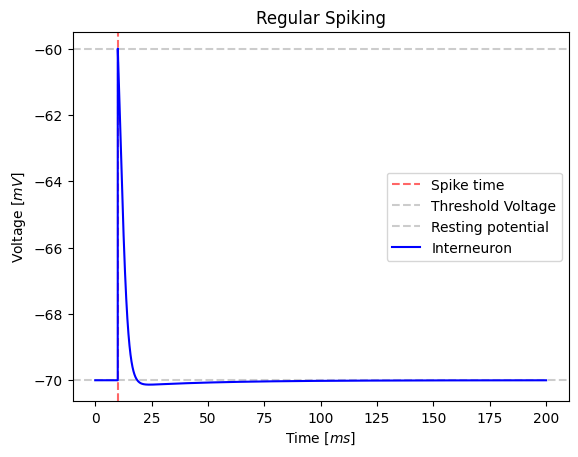

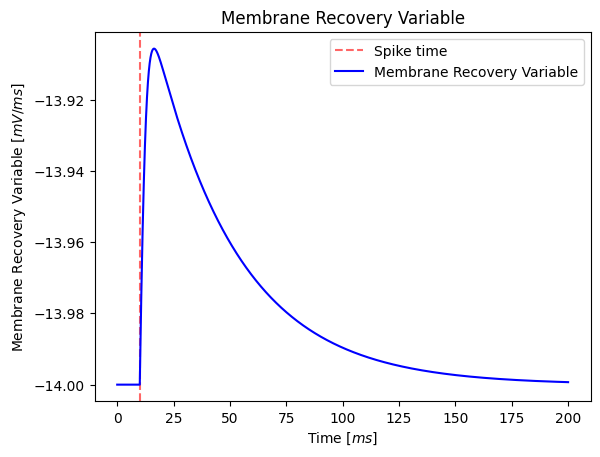

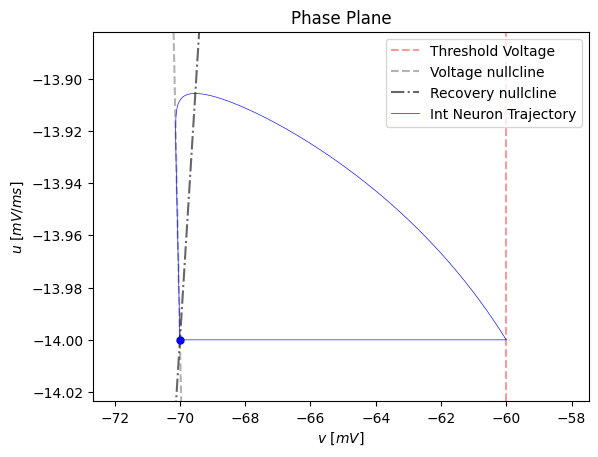

In [3]:
from brian2 import *
import matplotlib.pyplot as plt

start_scope()

# Neuronal Model for RA_int Neurons  # Inhibitory
v_th_int   =  -60. * mV # [mV] Threshold potential 

# Neuronal Parameters for RA_int Neurons
a_int =   0.02 / ms      # [Hz] Time scale of the recovery variable u
b_int =   0.2  / ms      # [Hz] Sensitivity of the recovery variable u to to the threshold fluctuations of v
c_int = -70.   * mV      # [mV] Resting Potential
d_int =   8    * mV/ms   # [mV/ms] Value at which u is reset
I_int =   0    * mV/ms   # [mV/ms] Constant external input current 

# Model Equation
Izhikevich_model = Equations(""" dv/dt = ( (0.04/ms/mV)*v**2 + (5/ms)*v + 140*mV/ms - u + I ) : volt
                                 du/dt = ( a*(b*v - u) ) : volt/second
                                 I : volt/second 
                                 a : 1/second 
                                 b : 1/second 
                                 c : volt
                                 d : volt/second
                             """)

# Define the time at which you want the neuron to spike
spike_time = 10 * ms  

# Create a SpikeGeneratorGroup with one neuron, spiking at `spike_time`
spike_gen = SpikeGeneratorGroup(1, [0], [spike_time])

nGroup = NeuronGroup(1, Izhikevich_model, threshold="v>=v_th_int", reset="v=c_int; u+=d_int", method="euler", dt=0.01*ms)

# Neuronal Parameters for RA_int Neurons
nGroup.a = a_int
nGroup.b = b_int
nGroup.c = c_int
nGroup.d = d_int
nGroup.I = I_int

# Set the initial values of the membrane potential 
nGroup.v = c_int
nGroup.u = b_int * c_int # Starting

# Connect the SpikeGeneratorGroup to your neuron group
synapse = Synapses(spike_gen, nGroup, on_pre='v = v_th_int')
synapse.connect()

# Monitors
vMon = StateMonitor(nGroup, 'v', record=True)
uMon = StateMonitor(nGroup, 'u', record=True)

run(200*ms)

### Voltage Trace ###

plt.title('Regular Spiking')

plt.axvline(spike_time/ms, linestyle='--', color='red',  alpha=.6, label='Spike time')
plt.axhline(v_th_int/mV,   linestyle='--', color='gray', alpha=.4, label='Threshold Voltage')
plt.axhline(c_int/mV,          linestyle='--', color='gray', alpha=.4, label='Resting potential')
plt.plot(vMon.t/ms, vMon.v[0]/mV, color='blue', label='Interneuron')
plt.xlabel(r'Time $[ms]$')
plt.ylabel(r'Voltage $[mV]$')
plt.legend()

plt.show()
                                        
### membrane recovery variable ###

plt.title('Membrane Recovery Variable')

plt.axvline(spike_time/ms, linestyle='--', color='red',  alpha=.6, label='Spike time')
# plt.axhline(d_int/mV*ms,       linestyle='--', color='gray', alpha=.4, label='Reset Value')
plt.plot(uMon.t/ms, uMon.u[0]/mV*ms, color='blue', label='Membrane Recovery Variable')
plt.xlabel(r'Time $[ms]$')
plt.ylabel(r'Membrane Recovery Variable $[mV/ms]$')
plt.legend()

plt.show()

### Phase Plane ###

plt.title('Phase Plane')

# Plot Threshold Voltage
plt.axvline(v_th_int/mV, linestyle='--', color='red', alpha=.4, label='Threshold Voltage')

# Plot the voltage nullcline
def voltage_nullcline(v, I):
    ''' u = 0.04v² + 5v + 140 + I '''
    return 0.04*v**2 + 5*v + 140 + I

v_values = np.linspace(np.min(vMon.v[0]/mV)-10,    np.max(vMon.v[0]/mV)+10, 1000)
plt.plot(v_values, voltage_nullcline(v_values, I_int/mV*ms), color='gray', ls='--', alpha=.6, label='Voltage nullcline')

# Plot the recovery nullcline
def recovery_nullcline(b, v):
    ''' u = b v '''
    return b*v 

u_values = np.linspace(np.min(uMon.u[0]/mV*ms)-10, np.max(uMon.u[0]/mV*ms)+10, 1000)
plt.plot(v_values, recovery_nullcline(b_int*ms, v_values), color='black', ls='-.', alpha=.6, label='Recovery nullcline')
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
# Plot starting point
plt.plot(vMon.v[0][0]/mV, uMon.u[0][0]/mV*ms, color='blue', marker='o', markersize=5)

# Plot trajectory
plt.plot(vMon.v[0]/mV, uMon.u[0]/mV*ms, color='blue', label='Int Neuron Trajectory', lw=.5, alpha=.9)

# Calculate the minimum and maximum values
x_min = np.min(vMon.v[0] / mV)
x_max = np.max(vMon.v[0] / mV)
y_min = np.min(uMon.u[0] / mV * ms)
y_max = np.max(uMon.u[0] / mV * ms)

# Calculate 10% of the range
x_range = x_max - x_min
x_padding = 0.25 * x_range
y_range = y_max - y_min
y_padding = 0.25 * y_range

# Set y-axis limits with 10% padding
plt.xlim([x_min - x_padding, x_max + x_padding])
plt.ylim([y_min - y_padding, y_max + y_padding])

# Label the axes
plt.xlabel(r'$v$ $[mV]$')
plt.ylabel(r'$u$ $[mV/ms]$')

plt.legend()

plt.show()

## Tuning of Izhikevich Model for nXIIts Neurons

Firing rate: 80. Hz


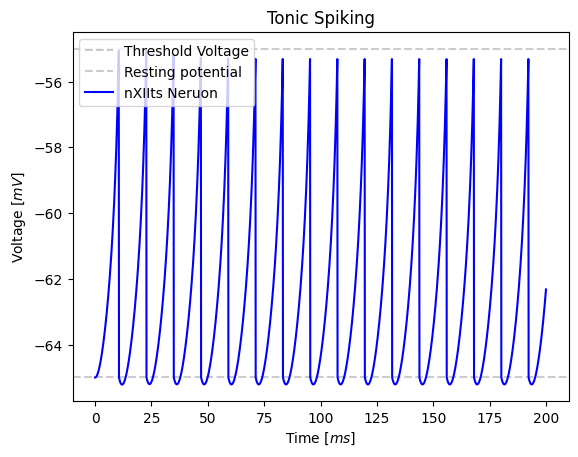

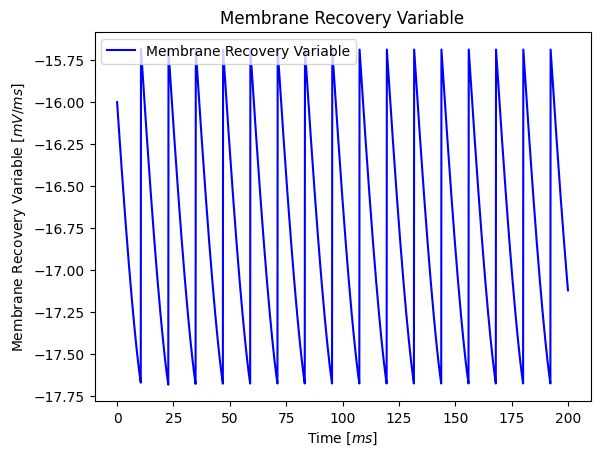

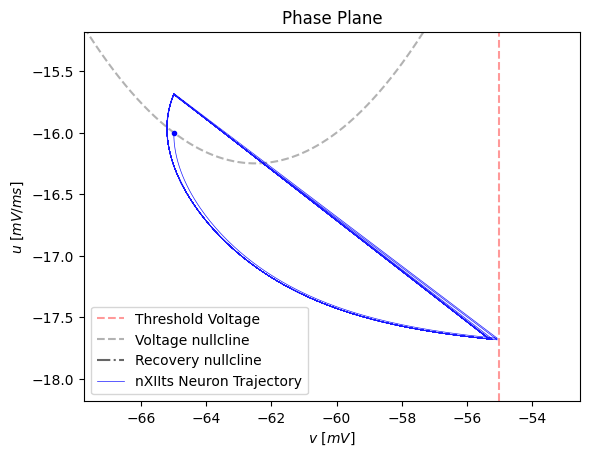

In [4]:
from brian2 import *
import matplotlib.pyplot as plt

start_scope()

# Neuronal Model for RA_nXIIts Neurons  # Inhibitory
v_th_nXIIts   = -55. * mV # [mV] Threshold potential 

# Neuronal Parameters for RA_nXIIts Neurons (Tonically Active)
a_nXIIts =   0.02 / ms      # [Hz] Time scale of the recovery variable u
b_nXIIts =   0.4  / ms      # [Hz] Sensitivity of the recovery variable u to to the threshold fluctuations of v
c_nXIIts = -65.   * mV      # [mV] Resting Potential
d_nXIIts =   2    * mV/ms   # [mV/ms] Value at which u is reset
I_nXIIts =   0    * mV/ms   # [mV/ms] Constant external input current 

# Model Equation
Izhikevich_model = Equations(""" dv/dt = ( (0.04/ms/mV)*v**2 + (5/ms)*v + 140*mV/ms - u + I ) : volt
                                 du/dt = ( a*(b*v - u) ) : volt/second
                                 I : volt/second 
                                 a : hertz 
                                 b : hertz 
                                 c : volt
                                 d : volt/second
                             """)

# Define the time at which you want the neuron to spike
spike_time = 10 * ms  

nGroup = NeuronGroup(1, Izhikevich_model, threshold='v>=v_th_nXIIts', reset="v=c_nXIIts; u+=d_nXIIts", method='euler')

# Neuronal Parameters for RA_nXIIts Neurons
nGroup.a = a_nXIIts
nGroup.b = b_nXIIts
nGroup.c = c_nXIIts
nGroup.d = d_nXIIts
nGroup.I = I_nXIIts

# Set the initial values of the membrane potential 
nGroup.v = c_nXIIts
nGroup.u = -16 * mV/ms

spikeMon = SpikeMonitor(nGroup)

vMon = StateMonitor(nGroup, 'v', record=True)
uMon = StateMonitor(nGroup, 'u', record=True)

runtime = 200*ms
run(runtime)

### Firing Rate ###

print('Firing rate:', spikeMon.count[0]/runtime)

### Voltage Trace ###

plt.title('Tonic Spiking')
plt.axhline(v_th_nXIIts/mV,      linestyle='--', color='gray', alpha=.4, label='Threshold Voltage')
plt.axhline(c_nXIIts/mV,     linestyle='--', color='gray', alpha=.4, label='Resting potential')
plt.plot(vMon.t/ms, vMon.v[0]/mV, color='blue', label='nXIIts Neruon')
plt.xlabel(r'Time $[ms]$')
plt.ylabel(r'Voltage $[mV]$')
plt.legend()

plt.show()

### membrane recovery variable ###

plt.title('Membrane Recovery Variable')

# plt.axhline(d_nXIIts/mV*ms,       linestyle='--', color='gray', alpha=.4, label='Reset Value')
plt.plot(uMon.t/ms, uMon.u[0]/mV*ms, color='blue', label='Membrane Recovery Variable')
plt.xlabel(r'Time $[ms]$')
plt.ylabel(r'Membrane Recovery Variable $[mV/ms]$')
plt.legend()

plt.show()

### Phase Plane ###

plt.title('Phase Plane')

# Plot Threshold Voltage
plt.axvline(v_th_nXIIts/mV, linestyle='--', color='red', alpha=.4, label='Threshold Voltage')

# Plot the voltage nullcline
def voltage_nullcline(v, I):
    ''' u = 0.04v² + 5v + 140 + I '''
    return 0.04*v**2 + 5*v + 140 + I

v_values = np.linspace(np.min(vMon.v[0]/mV)-10,    np.max(vMon.v[0]/mV)+10, 1000)
plt.plot(v_values, voltage_nullcline(v_values, I_int/mV*ms), color='gray', ls='--', alpha=.6, label='Voltage nullcline')

# Plot the recovery nullcline
def recovery_nullcline(b, v):
    ''' u = b v '''
    return b*v 

u_values = np.linspace(np.min(uMon.u[0]/mV*ms)-10, np.max(uMon.u[0]/mV*ms)+10, 1000)
plt.plot(v_values, recovery_nullcline(b_nXIIts*ms, v_values), color='black', ls='-.', alpha=.6, label='Recovery nullcline')

# Plot starting point
plt.plot(vMon.v[0][0]/mV, uMon.u[0][0]/mV*ms, color='blue', marker='o', markersize=3)

# Plot trajectory
plt.plot(vMon.v[0]/mV, uMon.u[0]/mV*ms, color='blue', label='nXIIts Neuron Trajectory', lw=.5, alpha=.9)

# Calculate the minimum and maximum values
x_min = np.min(vMon.v[0] / mV)
x_max = np.max(vMon.v[0] / mV)
y_min = np.min(uMon.u[0] / mV * ms)
y_max = np.max(uMon.u[0] / mV * ms)

# Calculate 10% of the range
x_range = x_max - x_min
x_padding = 0.25 * x_range
y_range = y_max - y_min
y_padding = 0.25 * y_range

# Set y-axis limits with 10% padding
plt.xlim([x_min - x_padding, x_max + x_padding])
plt.ylim([y_min - y_padding, y_max + y_padding])

# Label the axes
plt.xlabel(r'$v$ $[mV]$')
plt.ylabel(r'$u$ $[mV/ms]$')

plt.legend()

plt.show()

## Parameter Estimation for STDP Model for HVC_RA and RA_nxIIts Neurons (Excitatory)

Text(0, 0.5, 'Weight')

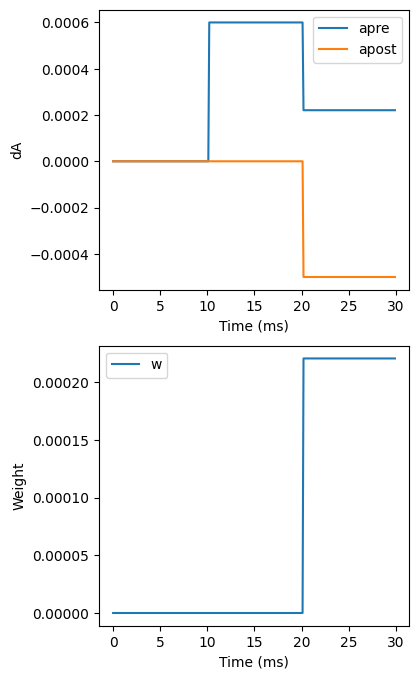

In [5]:
from brian2 import *
import matplotlib.pyplot as plt

start_scope()

taupre_ex  = 10*ms
taupost_ex = 15*ms
wmax_ex    =  .01 # mV
apre_increment_ex  =  .06 * wmax_ex
apost_increment_ex = -.05 * wmax_ex

G = NeuronGroup(2, 'v:1', threshold='t>(1+i)*10*ms', refractory=100*ms)

synapse_eqs_ex = ''' w : 1
                     dapre/dt  = -apre/taupre_ex   : 1 (event-driven)
                     dapost/dt = -apost/taupost_ex : 1 (event-driven) '''
stdp_pre_ex    = ''' apre += apre_increment_ex
                     w = clip(w + apost, 0, wmax_ex) 
                     '''
                     # v_post += w
stdp_post_ex   = ''' apost += apost_increment_ex
                     w = clip(w + apre, 0, wmax_ex) '''

S = Synapses(G, G,  model=synapse_eqs_ex, on_pre=stdp_pre_ex, on_post=stdp_post_ex)
S.connect(i=0, j=1)

M = StateMonitor(S, ['w', 'apre', 'apost'], record=True)

run(30*ms)

plt.figure(figsize=(4, 8))


plt.subplot(211)
plt.plot(M.t/ms, M.apre[0], label='apre')
plt.plot(M.t/ms, M.apost[0], label='apost')
plt.xlabel('Time (ms)')
plt.ylabel('dA')
plt.legend()

plt.subplot(212)
plt.plot(M.t/ms, M.w[0], label='w')
plt.legend(loc='best')
plt.xlabel('Time (ms)')
plt.ylabel('Weight')


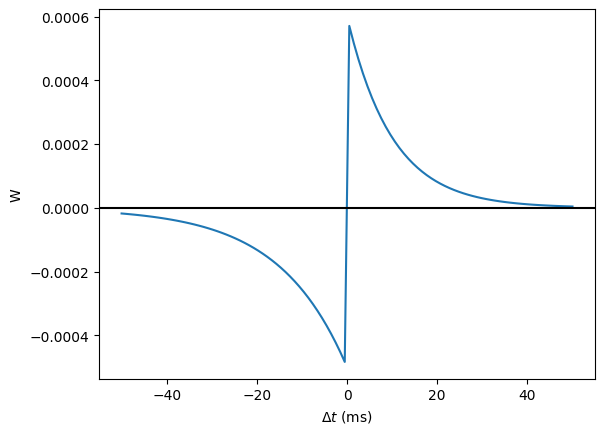

In [6]:
# Analytical Solution

import numpy as np
from brian2 import *
import matplotlib.pyplot as plt

tau_pre  = 10*ms
tau_post = 15*ms
wmax     =  .01
A_pre    =  .06 * wmax
A_post   = -.05 * wmax
delta_t  = np.linspace(-50, 50, 100)*ms

W = np.where(delta_t>0, A_pre*np.exp(-delta_t/tau_pre), A_post*np.exp(delta_t/tau_post))

plt.plot(delta_t/ms, W)
plt.xlabel(r'$\Delta t$ (ms)')
plt.ylabel('W')
plt.axhline(0, ls='-', c='k');

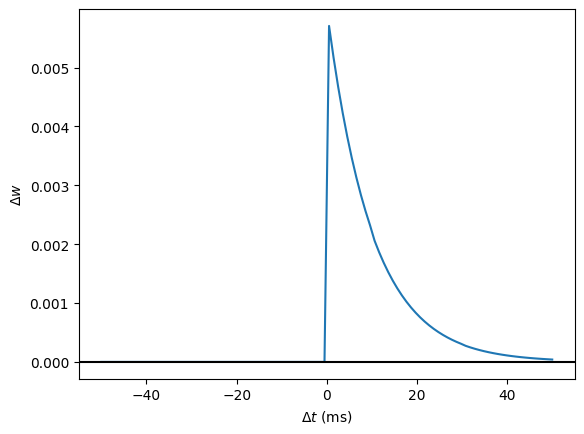

In [7]:
# Numerical Solution

from brian2 import *
import matplotlib.pyplot as plt

start_scope()

tmax = 50*ms

taupre_ex  = 10*ms
taupost_ex = 15*ms
wmax_ex    =  .1 # mV
apre_increment_ex  =  .06 * wmax_ex
apost_increment_ex = -.05 * wmax_ex

N = 100

# Presynaptic neurons G spike at times from 0 to tmax
# Postsynaptic neurons G spike at times from tmax to 0
# So difference in spike times will vary from -tmax to +tmax
G = NeuronGroup(N, 'tspike:second', threshold='t>tspike', refractory=100*ms)
H = NeuronGroup(N, 'tspike:second', threshold='t>tspike', refractory=100*ms)
G.tspike = 'i*tmax/(N-1)'
H.tspike = '(N-1-i)*tmax/(N-1)'

synapse_eqs_ex = ''' w : 1
                     dapre/dt  = -apre/taupre_ex   : 1 (event-driven)
                     dapost/dt = -apost/taupost_ex : 1 (event-driven) '''
stdp_pre_ex    = ''' apre += apre_increment_ex
                     w = clip(w + apost, 0, wmax_ex) '''
                     #v_post += w '''
stdp_post_ex   = ''' apost += apost_increment_ex
                     w = clip(w + apre, 0, wmax_ex) '''

S = Synapses(G, H,  model=synapse_eqs_ex, on_pre=stdp_pre_ex, on_post=stdp_post_ex)
S.connect(j='i')

run(tmax+1*ms)

plt.plot((H.tspike-G.tspike)/ms, S.w)
plt.xlabel(r'$\Delta t$ (ms)')
plt.ylabel(r'$\Delta w$')
plt.axhline(0, ls='-', c='k');

## Parameter Estimation for STDP Model for RA_int Neurons (Inhibitory)

In [8]:
from brian2 import *
import matplotlib.pyplot as plt

start_scope()

taupre_ex  = 10*ms
taupost_ex = 15*ms
wmax_ex    =  1 # mV
apre_increment_ex  =  .06 * wmax_ex
apost_increment_ex = -.05 * wmax_ex

G = NeuronGroup(2, 'v:1', threshold='t>(1+i)*10*ms', refractory=100*ms)

synapse_eqs_in = ''' w : 1
                     dapre/dt  = -apre/taupre_in   : 1 (event-driven)
                     dapost/dt = -apost/taupost_in : 1 (event-driven) '''
stdp_pre_in    = ''' apre += apre_increment_in
                     w = clip(w + apost, 0, wmax_in) '''
                    # v_post -= w
stdp_post_in   = ''' apost += apost_increment_in
                     w = clip(w + apre, 0, wmax_in) '''

S = Synapses(G, G,  model=synapse_eqs_in, on_pre=stdp_pre_in, on_post=stdp_post_in)
S.connect(i=0, j=1)

M = StateMonitor(S, ['w', 'apre', 'apost'], record=True)

run(30*ms)

plt.figure(figsize=(4, 8))
plt.subplot(211)
plt.plot(M.t/ms, M.apre[0], label='apre')
plt.plot(M.t/ms, M.apost[0], label='apost')
plt.legend()
plt.subplot(212)
plt.plot(M.t/ms, M.w[0], label='w')
plt.legend(loc='best')
plt.xlabel('Time (ms)')

BrianObjectException: Error encountered with object named 'synapses_3_pre'.
Object was created here (most recent call only, full details in debug log):
  File 'C:\Users\sebas\AppData\Local\Temp\ipykernel_24164\857391173.py', line 23, in <module>
    S = Synapses(G, G,  model=synapse_eqs_in, on_pre=stdp_pre_in, on_post=stdp_post_in)

An error occurred when preparing an object. (See above for original error message and traceback.)

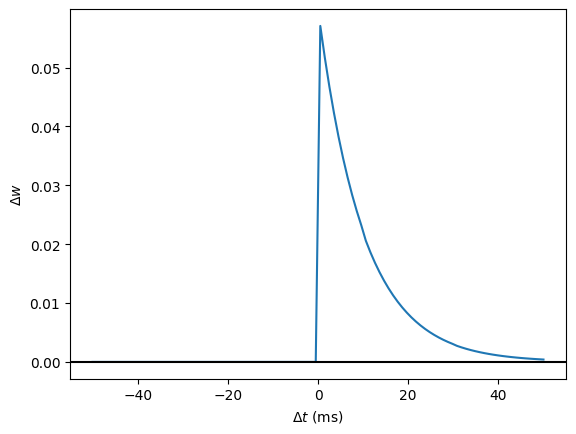

In [ ]:
from brian2 import *
import matplotlib.pyplot as plt

start_scope()

tmax = 50*ms

taupre_in   = 10*ms
taupost_in  = 15*ms
wmax_in     =  1 # mV
apre_increment_in  =  .06 * wmax_in
apost_increment_in = -.05 * wmax_in

N = 100

# Presynaptic neurons G spike at times from 0 to tmax
# Postsynaptic neurons G spike at times from tmax to 0
# So difference in spike times will vary from -tmax to +tmax
G = NeuronGroup(N, 'tspike:second', threshold='t>tspike', refractory=100*ms)
H = NeuronGroup(N, 'tspike:second', threshold='t>tspike', refractory=100*ms)
G.tspike = 'i*tmax/(N-1)'
H.tspike = '(N-1-i)*tmax/(N-1)'

synapse_eqs_in = ''' w : 1
                     dapre/dt  = -apre/taupre_in   : 1 (event-driven)
                     dapost/dt = -apost/taupost_in : 1 (event-driven) '''
stdp_pre_in    = ''' apre += apre_increment_in
                     w = clip(w + apost, 0, wmax_in) '''
                    # v_post -= w
stdp_post_in   = ''' apost += apost_increment_in
                     w = clip(w + apre, 0, wmax_in) '''

S = Synapses(G, H,  model=synapse_eqs_in, on_pre=stdp_pre_in, on_post=stdp_post_in)
S.connect(j='i')

run(tmax+1*ms)

plt.plot((H.tspike-G.tspike)/ms, -S.w)
plt.xlabel(r'$\Delta t$ (ms)')
plt.ylabel(r'$\Delta w$')
plt.axhline(0, ls='-', c='k');